# Topic 1 Lab Data Viz Tutorial (R)

In this tutorial, you will learn the basics on how to load data and do simple plots using **R**.

Given that this **R Notebook** is mounted online, I have already set the two .csv files "in disk" (i.e. in the same location as the notebook). If you are not familiar with R or notebooks, this simply means that when you work with any type of data in an offline manner, it is a common practice that your data files are stored in the same location as the notebook (i.e. an .r file).

Firstly, we will load both files into variables using the `read.csv` command:

In [1]:
temp <- read.csv('../input/cm4125-week-1-lab/temp.csv')

In [2]:
pirates <- read.csv('../input/cm4125-week-1-lab/pirates.csv')

You can see the contents of the two variables by **writing the name of the variable**

In [3]:
temp

Year,Global.Average.Temperature..Celsius.
<int>,<dbl>
1820,14.25
1860,14.27
1880,14.60
1920,14.90
1940,15.26
1980,15.52
2000,15.99


In [4]:
pirates

Year,Number.of.Pirates..Approximate.
<int>,<int>
1820,35000
1860,45000
1880,20000
1920,15000
1940,5000
1980,400
2000,17


Given that we have two tables with the same amount of rows (but particularly the *same* year for each data entry), we can create a single data frame with all the data on it!

We will see many ways to do this later on during the module, but for the time being, we will **bind** the colums we need into a variable calles `df`:

In [5]:
df <- cbind(temp, pirates)
df

Year,Global.Average.Temperature..Celsius.,Year,Number.of.Pirates..Approximate.
<int>,<dbl>,<int>,<int>
1820,14.25,1820,35000
1860,14.27,1860,45000
1880,14.60,1880,20000
1920,14.90,1920,15000
1940,15.26,1940,5000
1980,15.52,1980,400
2000,15.99,2000,17


Unfortunately, the `Year` column has been duplicated! This can be avoided through several other operations, but for now on we will simply **drop duplicates** with the following function:

In [6]:
df <- df[, !duplicated(colnames(df))]
df

Year,Global.Average.Temperature..Celsius.,Number.of.Pirates..Approximate.
<int>,<dbl>,<int>
1820,14.25,35000
1860,14.27,45000
1880,14.60,20000
1920,14.90,15000
1940,15.26,5000
1980,15.52,400
2000,15.99,17


Now it's time to plot! Firstly, we will import the **ggplot** module, which allows us to draw plots easily:

In [7]:
library(ggplot2)

Then, we will define a *scatterplot* with the pirates in the x axis, the temperature in the y axis

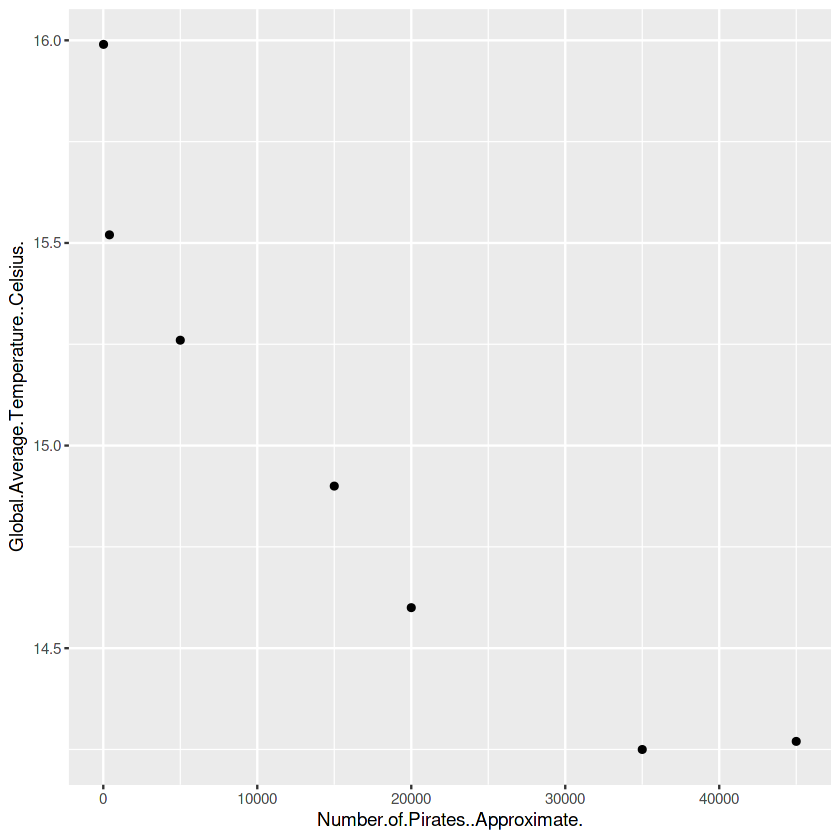

In [8]:
ggplot(df, aes(x=Number.of.Pirates..Approximate., y=Global.Average.Temperature..Celsius.))+ geom_point()

The difference between this plot and the first Pastafarian one is that, if the year is not considered, then Python (and almost any other plotting tool) will sort the points throughout the x-axis and not by year.

This is because, in reality, the first Pastafarian plot is more like a "bar chart" where the number of pirates act as discrete categories ordered by year, and the temperature is the value on the y axis!

Therefore, we need to create a plot that mimics this design:

In [9]:
# First, we convert the pirates column into a categorical one
df$Number.of.Pirates..Approximate. = as.factor(df$Number.of.Pirates..Approximate.)

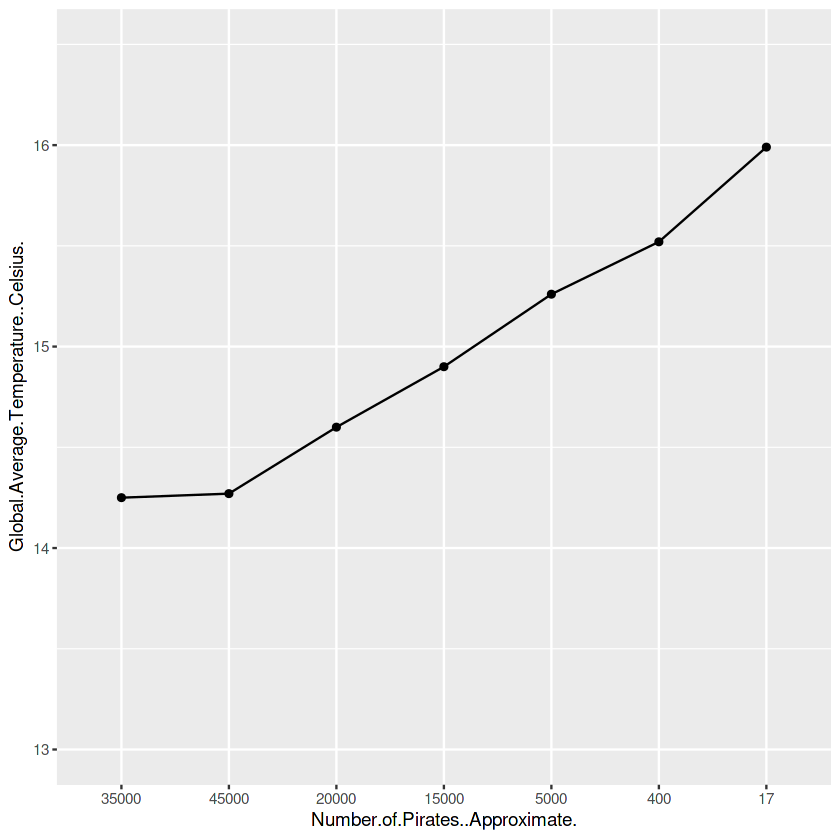

In [10]:
# Now we plot (with the scale_x_discrete parameter we can sort the values in x by order of appearance in the table
ggplot(df, aes(x=Number.of.Pirates..Approximate.,
                         y=Global.Average.Temperature..Celsius., group=1))+
                         geom_line(color="black")+geom_point()+ylim(13, 16.5)+
                         scale_x_discrete(limits = df$Number.of.Pirates..Approximate.)

**BONUS: CAN YOU ADD THE YEARS ON TOP OF EACH DOT?**

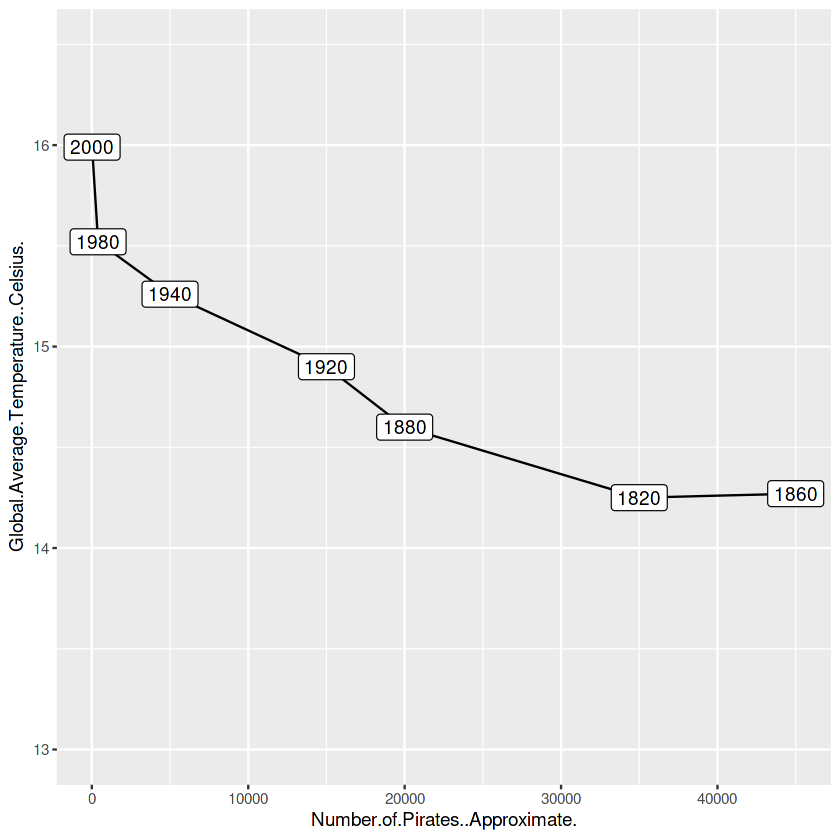

In [32]:
## Use this cell to improve my code, this is as much as I can do!
p<-ggplot(df, aes(x=Number.of.Pirates..Approximate.,label=Year,
                         y=Global.Average.Temperature..Celsius., group=1))+
                         geom_line(color="black")+geom_point()+ylim(13, 16.5)
p+geom_label()

To plot the second version of the Pastafarian plot (i.e. the two lines), we can use ggplot as well:

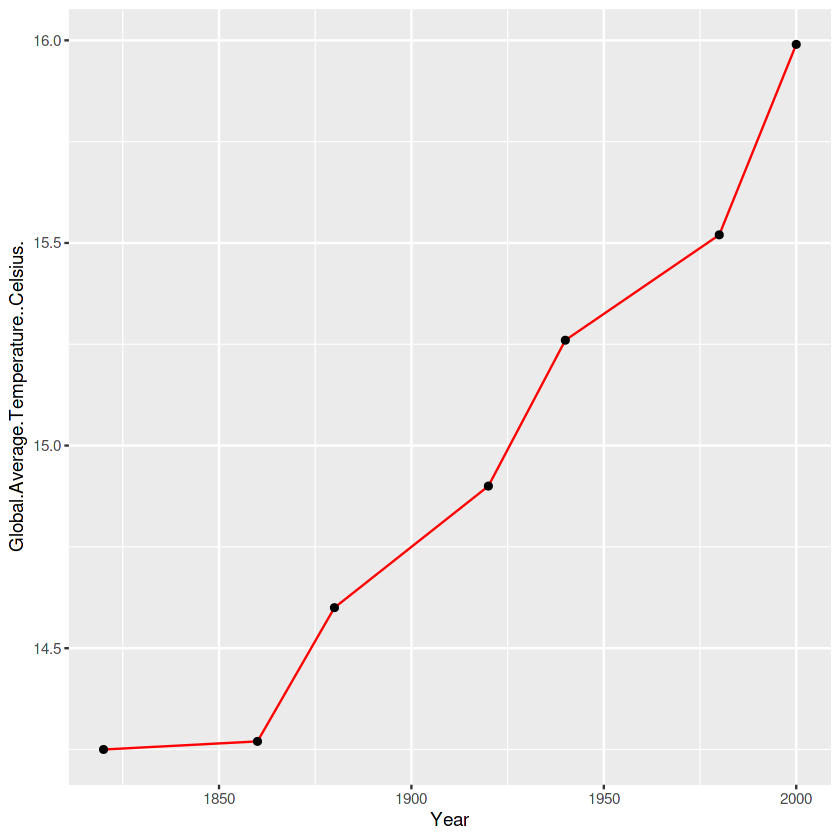

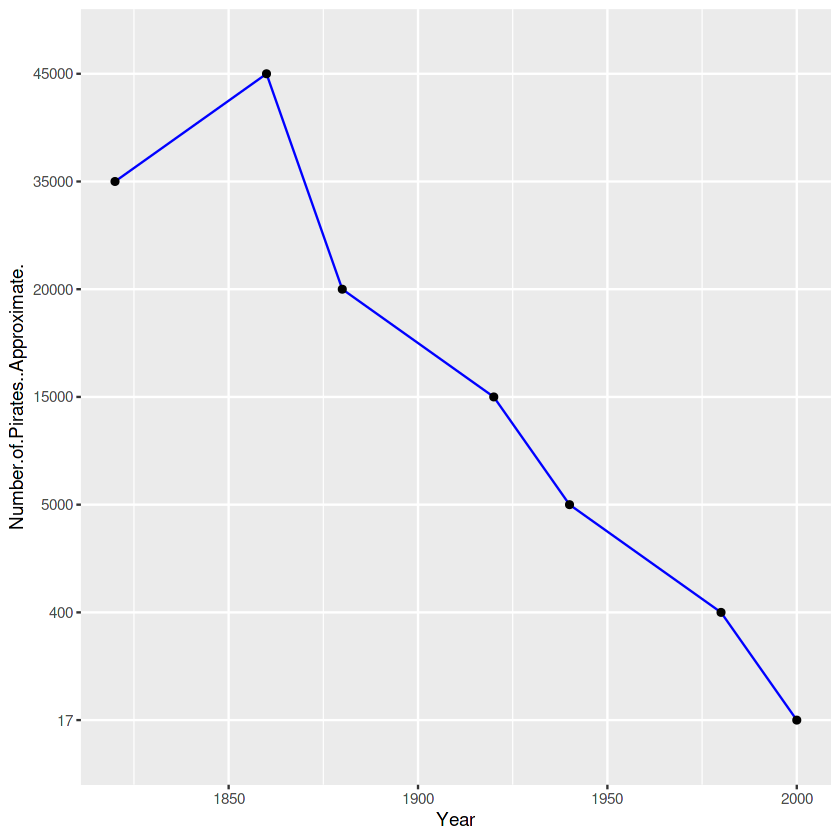

In [12]:
ggplot(df, aes(x=Year,y=Global.Average.Temperature..Celsius., group=1))+
                         geom_line(color="red")+geom_point()
ggplot(df, aes(x=Year,y=Number.of.Pirates..Approximate., group=1))+
                         geom_line(color="blue")+geom_point()

Once again, there are major differences between our plot and the second Pastafarian one! The main issue now is that the *scale* of the pirate data is vastly different to the temperature one, and thus, ggplot plotted them in different spaces!

We need to specify that we want both plots drawn with different scales in the same plotting space (something that I highly discourage, we will see why later in this module!)

In [13]:
# We convert the pirates column back to a numerical one
df$Number.of.Pirates..Approximate. = as.numeric(as.character(df$Number.of.Pirates..Approximate.))

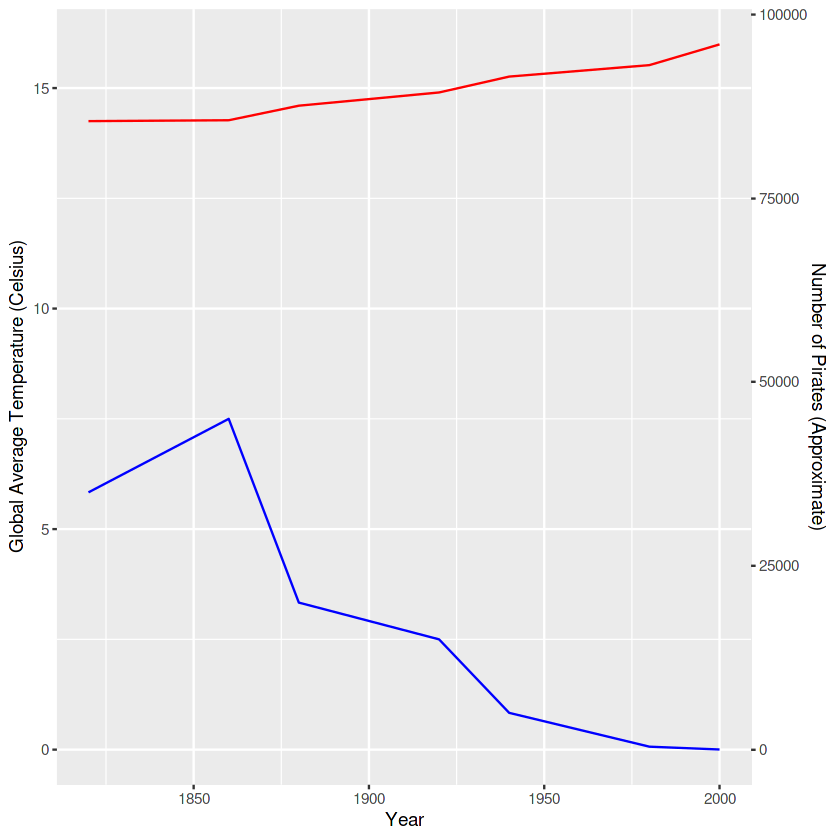

In [14]:
# Now we plot
# Value used to transform the second axis (it is an estimate)
coeff <- 6000

ggplot(df, aes(x=Year)) +
  
  geom_line(aes(y=Global.Average.Temperature..Celsius.), color="red") +
  geom_line(aes(y=Number.of.Pirates..Approximate. / coeff), color = "blue")  +
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "Global Average Temperature (Celsius)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="Number of Pirates (Approximate)")
  )

**BONUS**: Can you make it look more like the one shown in the lecture?

In [11]:
## Use this cell for your code
